# Regression | ecommerce.csv | Kat Cosgrove | 28 March 2018

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib

### Load up this data set into a Pandas DataFrame, show the first 5 rows of the dataset

In [2]:
df = pd.read_csv('./ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Show the description and the info on the dataset, using appropriate Pandas functions

In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### Use seaborn jointplot function to see which fields correlate well with the "Yearly Amount Spent" column. Write your findings.

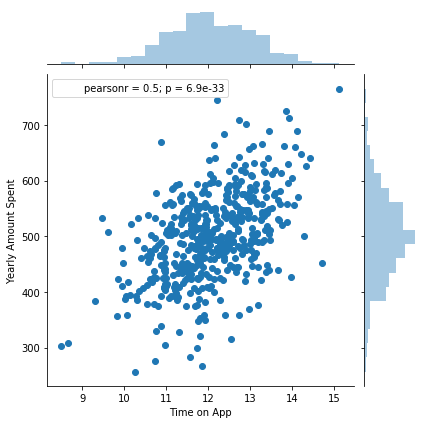

In [5]:
import warnings
warnings.filterwarnings('ignore')
spending = df
sns.jointplot("Time on App", "Yearly Amount Spent", data=spending)

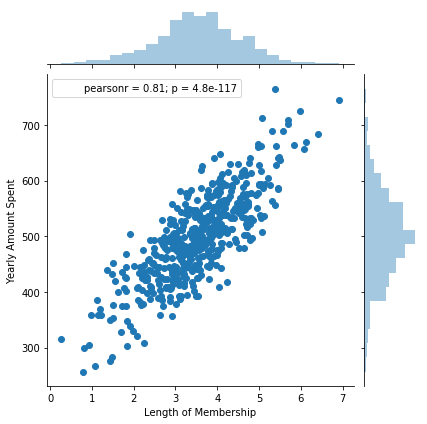

In [6]:
warnings.filterwarnings('ignore')
sns.jointplot("Length of Membership", "Yearly Amount Spent", data=spending)

### Answer: It looks like there is a strong correlation between the length of a membership and the amount spent per year. Weak for length of a style session, weak for time spent on the website, and fairly strong for time spent on the app.

### Make a summary plot of feature relationships using pairplot function of Seaborn

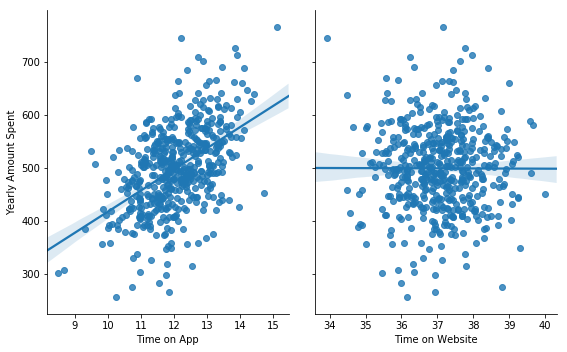

In [7]:
sns.pairplot(spending, x_vars=["Time on App", "Time on Website"], y_vars=["Yearly Amount Spent"], size=5, aspect=.8, kind="reg")

### Create two dataframes: one for the target variable ("Yearly Amount Spent"), the other - containing all the rest of numerical features

In [8]:
yearly = pd.DataFrame(df['Yearly Amount Spent'])
minus_spending = df.drop('Yearly Amount Spent', axis=1)._get_numeric_data()
columns = list(minus_spending.columns)
columns

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

### Split the data into a training and test sets. Make a test set size 0.3 and random seed 123

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(minus_spending, yearly, test_size=0.3, random_state=123)

### Fit a regression model on the training set

In [17]:
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print out the coefficients of the model

In [39]:
# coef_estimate = pd.DataFrame(list(zip(columns, lm.coef_)))
# coef_estimate
print(lm.coef_)

[[25.36266491 38.82367921  0.80356799 61.54905291]]


### Make a prediction of the target variable from features dataframe

In [28]:
predict_train = lm.predict(X_train)
predict_test = lm.predict(X_test)

### Calculate the Mean Average Error (using sklearn.metrics module)

In [27]:
print("Mean squared error: \n", mean_squared_error(Y_train, predict_train))

Mean squared error: 
 97.08917743168467


In [29]:
print("Mean squared error: \n", mean_squared_error(Y_test, predict_test))

Mean squared error: 
 102.72313941866021


### Using Seaborn distplot show the histogram of the residuals - differences between the target variable and predicted target variable

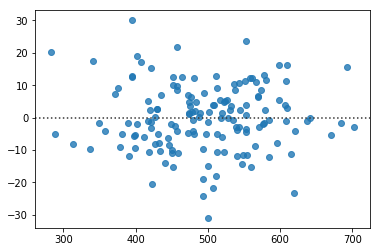

In [38]:
# sns.distplot(prediction_test)
sns.residplot(predict_test, Y_test)